In [1]:
#import libraries first
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import csv
from wsgiref import headers



In [2]:
#read the csv file
headers = ['Date', 'Time of day' , 'Total (grid load) MWh']


df=pd.read_csv('Actual_consumption_202111070000_202111072359_1.csv', names=headers)
print (df)


                                       Date        Time of day  \
0   Date;Time of day;Total (grid load)[MWh]                NaN   
1                                     Nov 7   2021;12:00 AM;12   
2                                     Nov 7   2021;12:15 AM;12   
3                                     Nov 7   2021;12:30 AM;12   
4                                     Nov 7   2021;12:45 AM;12   
..                                      ...                ...   
92                                    Nov 7   2021;10:45 PM;13   
93                                    Nov 7   2021;11:00 PM;12   
94                                    Nov 7   2021;11:15 PM;12   
95                                    Nov 7   2021;11:30 PM;12   
96                                    Nov 7   2021;11:45 PM;12   

    Total (grid load) MWh  
0                     NaN  
1                   315.0  
2                   212.0  
3                   191.0  
4                    29.0  
..                    ...  
92         

<Figure size 10000x10000 with 0 Axes>

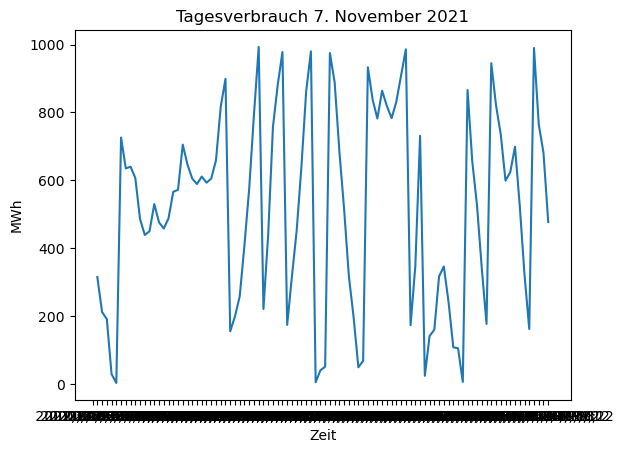

<Figure size 10000x10000 with 0 Axes>

In [3]:


time = df['Time of day']
mwh = df['Total (grid load) MWh']
x = list(time)
y = list(mwh)
plt.plot(x,y)
plt.xlabel('Zeit')
plt.ylabel('MWh')
plt.title('Tagesverbrauch 7. November 2021')
plt.figure(figsize=(100, 100))

# I cannot figure out how to make a proper timestep yet.




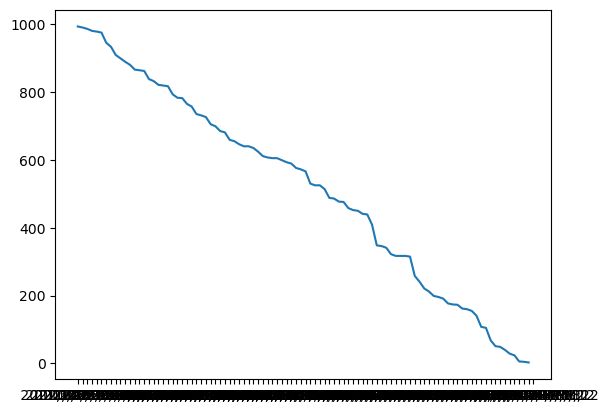

In [4]:
#Now, I want to display the load duration curve for this day. 
#Since, it is alled sliced into an almost "linear" graph I just sort the MWh coloumn and display the graph

mwh_sort = mwh.sort_values(ascending=False)
#time_sort = time.sort_values(ascending=True)

plt.plot(x, mwh_sort)



In [5]:
print(mwh_sort)

35    993.0
93    990.0
66    986.0
46    980.0
40    978.0
      ...  
70     24.0
78      6.0
47      5.0
5       3.0
0       NaN
Name: Total (grid load) MWh, Length: 97, dtype: float64


In [6]:
#Capacity factor
#The capacity factor describes a Energy ratio. Therefore it is necessary to divide the full load by the maximum
addedenergy =  477

for i in range(len(mwh_sort)-1):
    addedenergy = addedenergy + mwh_sort[i+1];
    #print(addedenergy)

hw = (addedenergy/993*(0.25/24))
print(addedenergy)
print(hw)

50258.0
0.5272113125209802


In [7]:
#peak to minimum power ratio

peak_to_min = 993/3
print(peak_to_min)

331.0


In [8]:
#peak to mean power ratio

mean = addedenergy/96

peak_to_mean = 993/mean

print(peak_to_mean)

1.8967726531099525
